<a href="https://colab.research.google.com/github/valkur5/Teoria-de-control2-2024/blob/main/ID_CHEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se detalla el empleo del algoritmo de Chen para identificación de sistemas mediante excitación de entrada escalón.
Los datos están disponibles en el sitio [éste](https://mega.nz/file/i0JUEJhZ#2SOFoihTCJzMUx5xmlL_5rb0F-1qj3agUFiXdxncrHo).
En el siguiente script, que es para emplear el método Chen de identificación de sistemas lineales, se requieren signal, io, y control. Lei Chen, Junhong Li. “Identification for the second-order systems based on the step response”. Mathematical and Computer Modelling 53 (2011) 1074–1083. https://linkinghub.elsevier.com/retrieve/pii/S0895717710005613.

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,763 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,347 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/uni

In [ ]:
!apt install octave

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Si se necesitan paquetes extras de Octave, se deben cargar.

In [ ]:
!apt install octave-signal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libslicot0 octave-control
The following NEW packages will be installed:
  libslicot0 octave-control octave-signal
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,577 kB of archives.
After this operation, 6,049 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libslicot0 amd64 5.0+20101122-4build1 [1,032 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 octave-control amd64 3.4.0-1 [339 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 octave-signal amd64 1.4.1-4build2 [207 kB]
Fetched 1,577 kB in 1s (1,149 kB/s)
Selecting previously unselected package libslicot0:amd64.
(Reading database ... 131962 files and directories currently installed.)
Preparing to unpack .../libslicot0_5.0+20101122-4build1_amd64.deb ...
Unpacking libslicot

In [ ]:
!apt install octave-io

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  ant ant-optional apparmor default-jre dictionaries-common fonts-dejavu-core fonts-dejavu-extra
  fonts-liberation2 fonts-opensymbol hunspell-en-us libabsl20210324 libactivation-java
  libaopalliance-java libapache-poi-java libapache-pom-java libargs4j-java
  libatinject-jsr330-api-java libatk-wrapper-java libatk-wrapper-java-jni libcdi-api-java
  libclucene-contribs1v5 libclucene-core1v5 libcodemodel-java libcommons-cli-java
  libcommons-codec-java libcommons-collections4-java libcommons-compress-java libcommons-io-java
  libcommons-lang3-java libcommons-logging-java libcommons-math3-java libcommons-parent-java
  libcurvesapi-java libdom4j-java libdtd-parser-java libeot0 libexttextcat-2.0-0 libexttextcat-data
  libfastinfoset-java libfontenc1 libgeronimo-annotation-1.3-spec-java
  libgeronimo-interceptor-3.0-spec-java libgpgme11 libgpgm

In [ ]:
!apt install octave-control

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave-control is already the newest version (3.4.0-1).
octave-control set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
%%writefile prueba.m
clc; clear all; close all;
pkg load control
pkg load signal
pkg load io
warning('off','all');
L=0.1;
m=0.15;
k=0.8;
R=0.25;
M=5;
v=5;
Kv=0.45;
Kf=0.45;

A=[-R/L 0 -Kv/L; 0 0 1; Kf/(m+M) -k/(m+M) 0]
B=[1/L;0;0]
C=[Kf 0 0]
D=0
[NUM,DEN]= ss2tf(A,B,C,D);
sistema=tf(NUM,DEN)
pole(sistema)
[Y,t]=step(sistema);
plot(t,Y)
print -dpng escalon.png

Overwriting prueba.m


Antes de correr el script de .m, debe cargarse el archivo con las curvas al entorno, empleando el ícono de subir archivo. Se recomienda emplear formatos compatibles.

Se puede correr el script y mostrar las imágenes generadas, con la librería PIL de Python.

In [ ]:
!octave prueba.m # -W : no window system

octave: X11 DISPLAY environment variable not set
octave: disabling GUI features
A =

  -2.5000        0  -4.5000
        0        0   1.0000
   0.0874  -0.1553        0

B =

   10
    0
    0

C =

   0.4500        0        0

D = 0

Transfer function 'sistema' from input 'u1' to output ...

               4.5 s^2 + 0.699         
 y1:  ---------------------------------
      s^3 + 2.5 s^2 + 0.5485 s + 0.3883

Continuous-time model.
ans =

  -2.3364 +      0i
  -0.0818 + 0.3994i
  -0.0818 - 0.3994i

      |---------------------------------------------------------------------|  
 2.5 +|+       +         +         +         +         +         +       +-+|  
     +|        +         +         +         +         +         +         +|  
      |                                                                     |  
      |         ***                                                         |  
   2 +|+       ** ***                                                    +-+|  
      |       

También puede emplearse el comando save() desde el script, y luego desde Colab levantar el archivo. En éste caso ID_Chen.mat. Luego se emplean funciones Python de matplotlib y se muestran las variables de interés.

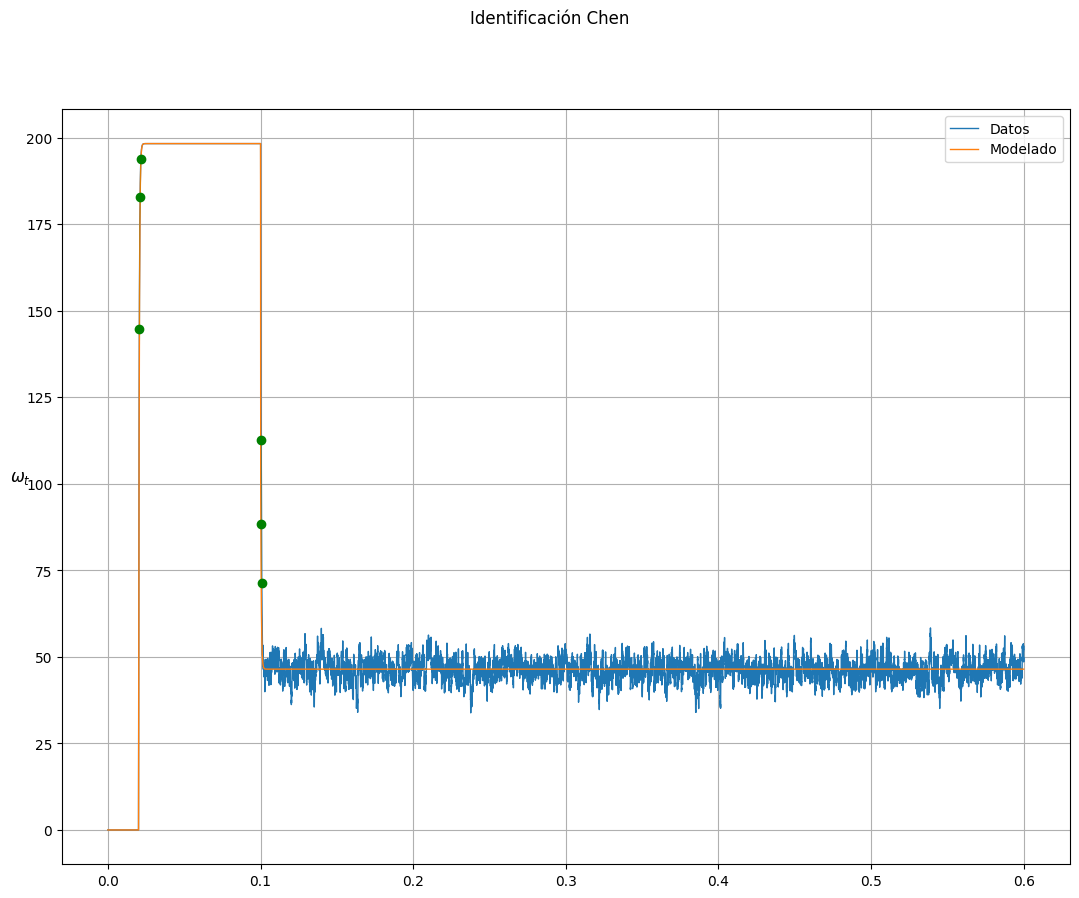

In [ ]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
#Importa los datos que se generaron desde Octave en el archivo .mat
mat = scipy.io.loadmat('/content/ID_Chen.mat')
y1=mat.get('y1')
y2=mat.get('y2')
t_s=mat.get('t_s')
t_D=mat.get('t_D')
y_D=mat.get('y_D')
t=mat.get('t')
ret=mat.get('ret')
t2=mat.get('t2')
t3=mat.get('t3')
y_t=mat.get('y_t')
y_t2=mat.get('y_t2')
y_t3=mat.get('y_t3')
y_t_tl=mat.get('y_t_tl')
y_t2_tl=mat.get('y_t2_tl')
y_t3_tl=mat.get('y_t3_tl')
ret_tl=mat.get('ret_tl')
t_tl=mat.get('t_tl')
t2_tl=mat.get('t2_tl')
t3_tl=mat.get('t3_tl')
#Ahora plotea las variables
fig, axs = plt.subplots(figsize=(13,10), dpi= 100)
fig.suptitle('Identificación Chen')
axs.plot(t_D, y_D, linewidth =1.0)
axs.set_ylabel('$\omega_t$',rotation=0, fontsize=10)
axs.plot(t_s, y1-y2, linewidth =1.0)
axs.set_ylabel('$\omega_t$',rotation=0, fontsize=12)
axs.grid( True )
axs.legend(['Datos','Modelado'])
# plot(t +ret,y_t,'o',t2+ret,y_t2,'o',t3+ret,y_t3,'o')
# plot(t_tl+ret_tl,y_t_tl,'o',t2_tl+ret_tl,y_t2_tl,'o',t3_tl+ret_tl,y_t3_tl,'o')
axs.plot([t[0][0] +ret[0][0] ,t2[0][0] +ret[0][0] ,t3[0][0] +ret[0][0] ],[y_t[0][0] ,y_t2[0][0] ,y_t3[0][0] ], linewidth =.1,  marker ='o', color='green')
axs.plot([t_tl[0][0] +ret_tl[0][0] ,t2_tl[0][0] +ret_tl[0][0] ,t3_tl[0][0] +ret_tl[0][0] ],[y_t_tl[0][0] ,y_t2_tl[0][0] ,y_t3_tl[0][0] ], linewidth =.1,  marker ='o', color='green')
plt.savefig('PyResultados_ID_Chen.png')


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# with open('/content/gdrive/My Drive/file.txt', 'w') as f:
  # f.write('content')